In [1]:
# coding: utf-8
# MNIST_example

# import packages
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# decide the constants
batch_size = 128
num_classes = 10
epochs = 20

In [3]:
# read MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

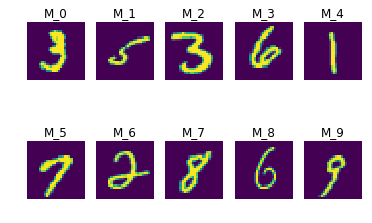

In [7]:
# draw the first 10 MNIST figures
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("M_%d" % i)
    plt.axis("off")
    plt.imshow(x_train[i+10].reshape(28, 28), cmap=None)
plt.show()

In [8]:
# pixel data normalization
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# Show the data for verification
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [11]:
# Modeling
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
# Output the symmary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [15]:
# Model compiling
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

Train on 54000 samples, validate on 6000 samples
Epoch 1/6
54000/54000 [==============================] - 3s 63us/step - loss: 0.0446 - acc: 0.9870 - val_loss: 0.0903 - val_acc: 0.9805
Epoch 2/6
54000/54000 [==============================] - 3s 61us/step - loss: 0.0367 - acc: 0.9891 - val_loss: 0.0743 - val_acc: 0.9825
Epoch 3/6
54000/54000 [==============================] - 3s 60us/step - loss: 0.0349 - acc: 0.9897 - val_loss: 0.0751 - val_acc: 0.9825
Epoch 4/6
54000/54000 [==============================] - 3s 59us/step - loss: 0.0320 - acc: 0.9907 - val_loss: 0.0820 - val_acc: 0.9843


In [16]:
# Start training
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

test loss: 0.08525979878269041
test acc: 0.9833


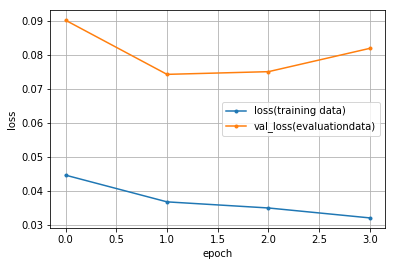

In [17]:
# Show the result of training
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluationdata)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()